In [1]:
import matplotlib.pyplot as plt
import numpy as np
import RPi.GPIO as GPIO
from time import sleep
np.seterr(divide='ignore', invalid='ignore')

ModuleNotFoundError: No module named 'RPi'

In [2]:
LED1 = 13
LED2 = 19
LED3 = 26
LED4 = 20

def setup_leds():
    """Configura los leds en modo salida"""
    GPIO.setmode(GPIO.BCM)
    GPIO.setup(LED1, GPIO.OUT)
    GPIO.setup(LED2, GPIO.OUT)
    GPIO.setup(LED3, GPIO.OUT)
    GPIO.setup(LED4, GPIO.OUT)

def leds_off():
    """Apaga todos los leds"""
    GPIO.output(LED1, GPIO.LOW)
    GPIO.output(LED2, GPIO.LOW)
    GPIO.output(LED3, GPIO.LOW)
    GPIO.output(LED4, GPIO.LOW)
    
def led_on(led):
    """Hace que el led recibido se encienda durante 3 segundos"""
    GPIO.output(led, GPIO.HIGH)
    print("Led ON")
    sleep(3)
    print("Led OFF")
    GPIO.output(led, GPIO.LOW)
    GPIO.cleanup()


In [3]:
from math import pi
def valores(a=-0.5, b=0.5):
    """Recibe el intervalo a evaluar, devuelve un diccionario
    con los valores en arrays y el delta del rango."""
    x = np.arange(a, b, 0.02) # Array con pasos de 0.02
    y = (np.tanh(3*x*2*pi) - np.cos(3*x*2*pi)/np.sin(3*x*2*pi)) / (((2*x)/5) - 3*x) #Función en radianes (2*pi)
    return {'x': x, 'y': y, 'puntos': b - a + 1} # Diccionario con los arrays y el delta

In [4]:
def cuadrantes(a, b, num, cant):
    """Apaga los leds antes de iniciar cada cuadrante por seguridad, anuncia 
    y enciende"""
    setup_leds()
    if(num<=a+cant):
        leds_off()
        print("Cuadrante 1")
        led_on(LED1)
    elif(num<=a+cant*2):
        leds_off()
        print("Cuadrante 2")
        led_on(LED2)
    elif(num<=a+cant*3):
        leds_off()
        print("Cuadrante 3")
        led_on(LED3)
    elif(num<=b):
        leds_off()
        print("Cuadrante 4")
        led_on(LED4)


In [5]:
def graficar(a=1,b=1,x=None):
    rangos = valores(a,b)
    delta = (b - a) / 4
    plt.plot(rangos['x'], rangos['y'])
    plt.xlabel("Eje X")
    plt.ylabel("Eje Y")
    for i in range(1,4):
        plt.axvline(x=a+delta*i, linestyle='--', color='g')
    plt.title("Grafica lab 4")
    # Solo grafica el punto si se envia el parámetro X
    if x is not None: 
        y = (np.tanh(3*x*2*pi) - np.cos(3*x*2*pi)/np.sin(3*x*2*pi)) / (((2*x)/5) - 3*x)
        # Señala con una flecha el punto evaluado
        plt.annotate("({},{:.1f})".format(x,y), xy=(x, y), xytext=(a+1, b+1),size=12, arrowprops=dict(arrowstyle='->'))
        cuadrantes(a, b, x, delta)
    # Fracción expresada con mathtext
    plt.text(b+1,a-1, r'$f(x)=\frac{tanh(3x) - cot(3x)} {\frac{2x}{5}-{3x}} $',
             color='g', fontsize=20)


1) Acotar por X
2) Acotar por Y
3) Evaluar
4) Salir
1
Ingrese el rango [a,b]: [10,50]


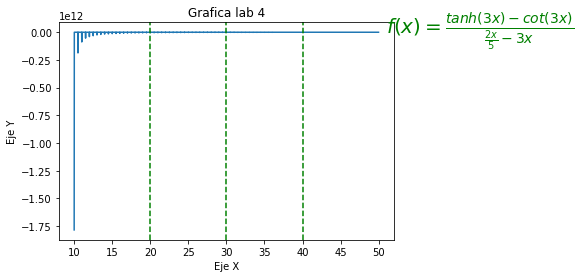

In [6]:
opc = int(input("""
1) Acotar por X
2) Acotar por Y
3) Evaluar
4) Salir
"""))
if(opc == 1):
    x = eval(input("Ingrese el rango [a,b]: "))
    graficar(x[0], x[1])
elif(opc == 2):
    pass
elif(opc == 3):
    x = eval(input("Ingrese el rango [a,b]: "))
    print(type(x[0]))
    rangos = valores(x[0], x[1])
    punto = eval(input("Ingrese el valor a evaluar: "))
    graficar(x[0], x[1], punto)
elif(opc == 4):
    exit()